# Photometry Basics Concepts and Units Workbook
##### by Bonnie Cooper  bcooper@sunyopt.edu
<br>

![](https://cdn.factcheck.org/UploadedFiles/lightbulb.jpg)  

### This notebook complements Lecture 1 of Spring Semester Proseminar of the Vision Science PhD program at SUNY College of Optometry


&emsp;In this lecture we will discuss some basic concepts of Radiometry & Photometry. Radiometry & Photometry are related fields in that they both measure quantities of light. However, the distinction between them is very important & relevant to Vision Science. Radiometry is a field of metrology that quantitates electromagnetic radiation in the environment. Photometry is different in that it refers specifically to the visible spectrum of light and accounts for the sensitivities of human observers at various wavelengths of light. The human photopic luminosity function, or V( $\lambda $ ), describes the envelope of sensitivity for human observers to the frequencies of visible light in light adapted conditions. (There is also a scotopic luminosity function for dark adaptation, mesopic for in between, etc). One way to think about the relationship between radiometry and photometry is that photometric measurements are electromagnetic radiation (radiometric) measures that have been bandpass filtered by V( $\lambda $ ). This lecture will shed light on V( $\lambda $ ) and bring meaning to relationship between radiometry and photometry.

&emsp;But first, unfortunately, we need to suffer through some very boring definitions.

### <font color='blue'>Radiometry: the watt. a measure of radiant power  
    
&emsp;Radiant Power is a measure specific to light sources. It measures the total electromagnetic power given off by a light source and is given in units of Watts or J/sec.

### <font color='blue'> Photometry: the lumen. a measure of luminous power
    
&emsp;Luminous Power, as with Radiant Power, is specific to light sources. However, Luminous Power only quantifies the visible light that is percieved by a human observer.A luminous power measure is fundamentally very different than a radiant power measure and is therefore given in different units, Lumens.

<br>  

&emsp;Let's take a look at V( $\lambda $ ) and work through some simple examples to understand the relationship between radiant power and luminous power.

![luminosityfxn](https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/Topic3.fig_18.gif)

&emsp;Under photopic conditions, V( $\lambda $ ) is shaped by the relative sensitivities of three cone photoreceptors: the Long, Medium, and Short cones (although in the figure above they are given as red, green & blue respectively). The Long and Medium cones are much more numerous than the short and contribute heavily to V( $\lambda $ ) & where these two cone sensitivities overlap, human observers are most sensitive to these wavelengths. 555mn is approximately the peak of V( $\lambda $ ), and at peak sensitivity the relationship between luminous power and radiant power has been quantified to be 680 lumens per watt.

&emsp;let us pretend we have a super efficient diode that only emits 555nm light. We can control the radiant power to increase/decrease the wattage emitted.
Let us calculate lumenous power (lumens)

<br>

In [104]:
lumens_per_watt_at555nm = 680 #known conversion factor for lumens/watt at 555nm
RadiantPower_magicDiode = 6 #radiant power (watts) of our light source
LuminousPower_magicDiode = RadiantPower_magicDiode*lumens_per_watt_at555nm
print( LuminousPower_magicDiode )

4080


<br>

&emsp;Well, that was pretty easy. To convert from radiant power to luminous power at 555nm, we just need to make use of a conversion factor. 

&emsp;But what if we have a light source that is not at 555nm? If that is the case, then we need to know the **Luminous Efficiency** at the wavelength of interest; this is given by the luminosity function, V( $\lambda $ ). In the figure above, at 555nm, the peak of the curve, the luminous efficiency is 1.0. The luminous efficiency at other wavelengths of light is a proportion of the peak sensitivity. We can use the figure above to make some estimates for a few simple calculations.

At 650nm, luminous efficiency is ~1/10th of that at peak 555nm.  
How does this effect the luminous power of a light source?


In [106]:
RadiantPower_magicDiode = 60 #radiant power (watts) of our light source
luminousEfficiency = .1 #luminous efficiency (relative to 555nm)
LuminousPower_magicDiode = RadiantPower_magicDiode*luminousEfficiency*lumens_per_watt_at555nm #note the same conversion factor is used here
print( LuminousPower_magicDiode )

4080.0


<br>     
<font size="4">QUESTION: How much more radiant power is required by our 650nm diode to equal the luminous power of the 555nm diode?
<br>

QUESTION: Look at the figure above, can you estimate the Luminous Efficiency at 500nm? 575? 450?
</font>

<br>

### <font color='blue'>Luminous Power (lumen) vs Luminous Intensity (candela (cd)) vs Luminance (foot-lamberts or candela/m^2)
Luminous power is a nondirectional measure. Luminous intensity refers to the number of lumens produced from a given direction of a light source.
#### 1 candela = lumen/steridian
Luminance is given in foot-lamberts, or more commonly candelas/meter^2
#### 1 foot-lambert = 3.426 cd/m^2

## <font color='red'>Illuminance (lux or foot-candles). The measure of luminous power falling on a surface.
Think of illuminance as the falling rain: it is ignorant of the surface upon which it falls. Many objects in the same environment may fall under the same illuminance and yet have very different luminance and other surfave spectral qualities. You can ask Qasim Zaidi for more on that!

<img src="https://d114hh0cykhyb0.cloudfront.net/assets/2019/03/06203201/FootcandleLuxTable2.jpg" width="400">

## <font color='red'> Inverse Square Law
The illumination of a surface is inversely proportional to the distance of the object to the light source illuminating it. This is the same for luminance/illuminance or radiance/irradiance (We can use the same equation of lumens/m^2 as watts/m^2)
#### E = I/D^2    
    where E = illumination of the surface (lux or foot-candles)
          I = luminous Intensity of the point source (candelas)
          d = distance from the point source to surface
![invSqrLaw](https://media1.britannica.com/eb-media/34/108834-004-B7B1A692.gif)    

In [9]:
d = 4 # meters
I = 1 # watts
E = I/d**2
print( E )

0.0625


## <font color='red'> Let's spend some time with the Luminosity Function

In [107]:
#let's use the pandas python library to import the CIE luminosity function info
#i got this from http://www.cvrl.org/lumindex.htm
#you can work off this code to take a look at other luminosity functions
import pandas as pd
#read the comma seperated value file in to a dataframe
data = pd.read_csv("/home/bonzilla/Documents/dataScienceStuff/logCIE2008v2q_fine.csv")
#show the 1st few values to get an idea of what the data in the file looks like
data.columns = ['wavelength', 'lum_efficiency']
data.head()

,wavelength,lum_efficiency
0,390.1,-3.22077
1,390.2,-3.21248
2,390.3,-3.20419
3,390.4,-3.19591
4,390.5,-3.18764


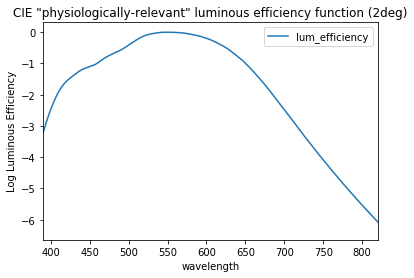

In [108]:
#great! now lets plot...
#let's use the python library matplotlib. there are others like seaborn that might be better, 
#but it's all about perspective
import matplotlib.pyplot as plt
data.plot(kind='line',x='wavelength',y='lum_efficiency')
plt.ylabel('Log Luminous Efficiency')
plt.title('CIE "physiologically-relevant" luminous efficiency function (2deg)')
plt.xlim(390,820)
plt.show()

In [109]:
import pandas as pd
data = pd.read_csv("/home/bonzilla/Documents/dataScienceStuff/vljve.csv")
#show the 1st few values to get an idea of what the data in the file looks like
data.columns = ['wavelength', 'lum_efficiency']
data.head()

,wavelength,lum_efficiency
0,385,0.000396
1,390,0.000800
2,395,0.001546
3,400,0.002800
4,405,0.004656


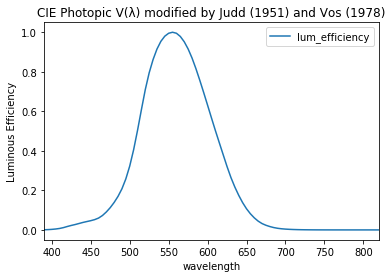

In [110]:
import matplotlib.pyplot as plt
data.plot(kind='line',x='wavelength',y='lum_efficiency')
plt.ylabel('Luminous Efficiency')
plt.title('CIE Photopic V(λ) modified by Judd (1951) and Vos (1978)')
plt.xlim(390,820)
plt.show()

In [111]:
#find the luminous efficiency at a desired wavelength
wavelengthCheck = 475
data.iloc[(data['wavelength']-wavelengthCheck).abs().argsort()[:1]]

,wavelength,lum_efficiency
18,475,0.11284


## <font color='red'> Let's talk about Filters

In [112]:
import numpy as np

#Let's generate a lowpass filter
lowpass_CUTOFF = 470 #(nm) set the cutoff for th lowpass filter. every wavelength above this will not pass through
#generate our filter
#find the index with the closest value
cutoff_idx = list(data.iloc[(data['wavelength']-lowpass_CUTOFF).abs().argsort()[:1]].index)
#make a new row in our dataframe to hold the vlues of our lowpass filter
data['lowpass_filter']=pd.DataFrame(np.zeros(shape=(len(data.lum_efficiency),1)))
data.loc[0:cutoff_idx[0],'lowpass_filter'] = 1
data.head()

,wavelength,lum_efficiency,lowpass_filter
0,385,0.000396,1.0
1,390,0.000800,1.0
2,395,0.001546,1.0
3,400,0.002800,1.0
4,405,0.004656,1.0


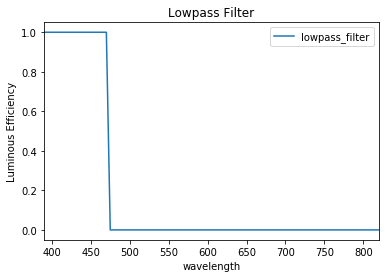

In [113]:
#let's plot our filter
import matplotlib.pyplot as plt
data.plot(kind='line',x='wavelength',y='lowpass_filter')
plt.ylabel('Luminous Efficiency')
plt.title('Lowpass Filter')
plt.xlim(390,820)
plt.show()

In [114]:
#Let's generate a lo500wpass filter
highpass_CUTOFF =  500#(nm) set the cutoff for th lowpass filter. every wavelength above this will not pass through
#generate our filter
#find the index with the closest value
cutoff_idx = list(data.iloc[(data['wavelength']-highpass_CUTOFF).abs().argsort()[:1]].index)
print(cutoff_idx[0])
#make a new row in our dataframe to hold the vlues of our lowpass filter
data['highpass_filter']=pd.DataFrame(np.zeros(shape=(len(data.lum_efficiency),1)))
data.loc[cutoff_idx[0]:len(data.lum_efficiency),'highpass_filter'] = 1
data.head()

23


,wavelength,lum_efficiency,lowpass_filter,highpass_filter
0,385,0.000396,1.0,0.0
1,390,0.000800,1.0,0.0
2,395,0.001546,1.0,0.0
3,400,0.002800,1.0,0.0
4,405,0.004656,1.0,0.0


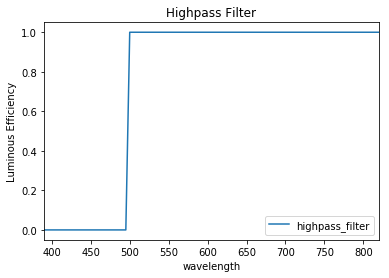

In [115]:
#let's plot our filter
import matplotlib.pyplot as plt
data.plot(kind='line',x='wavelength',y='highpass_filter')
plt.ylabel('Luminous Efficiency')
plt.title('Highpass Filter')
plt.xlim(390,820)
plt.show()

In [117]:
#let's make a bandpass filter too
lowband_CUTOFF = 470
highband_CUTOFF = 500 #(nm) set the cutoff for th lowpass filter. every wavelength above this will not pass through
#generate our filter
#find the index with the closest value
lowcutoff_idx = list(data.iloc[(data['wavelength']-lowband_CUTOFF).abs().argsort()[:1]].index)
highcutoff_idx = list(data.iloc[(data['wavelength']-highband_CUTOFF).abs().argsort()[:1]].index)
#make a new row in our dataframe to hold the vlues of our lowpass filter
data['bandpass_filter']=pd.DataFrame(np.zeros(shape=(len(data.lum_efficiency),1)))
data.loc[lowcutoff_idx[0]:highcutoff_idx[0],'bandpass_filter'] = 1
data.head()

,wavelength,lum_efficiency,lowpass_filter,highpass_filter,bandpass_filter
0,385,0.000396,1.0,0.0,0.0
1,390,0.000800,1.0,0.0,0.0
2,395,0.001546,1.0,0.0,0.0
3,400,0.002800,1.0,0.0,0.0
4,405,0.004656,1.0,0.0,0.0


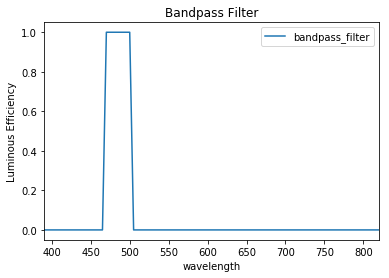

In [118]:
#great now let's plot it too
data.plot(kind='line',x='wavelength',y='bandpass_filter')
plt.ylabel('Luminous Efficiency')
plt.title('Bandpass Filter')
plt.xlim(390,820)
plt.show()

In [119]:
#now let's take an arbitrary function and pretend it gives the 
#spectral power emmision of some imaginary light source
#we're going to make this a column in our dataframe
#f(x) = sin(1.8x) + sin(x) + 5sin(4x+pi/2) + 1

import numpy as np
xvals = np.linspace( -np.pi, np.pi, len(data.lum_efficiency) )
weirdFunctionVals = np.sin(1.8* xvals ) + np.sin( xvals ) + 5*np.sin(4*xvals+np.pi/2) + 10
data['Light Source']=pd.DataFrame(weirdFunctionVals)
data.head()

,wavelength,lum_efficiency,lowpass_filter,highpass_filter,bandpass_filter,Light Source
0,385,0.000396,1.0,0.0,0.0,15.587785
1,390,0.000800,1.0,0.0,0.0,15.412752
2,395,0.001546,1.0,0.0,0.0,14.838094
3,400,0.002800,1.0,0.0,0.0,13.910626
4,405,0.004656,1.0,0.0,0.0,12.704975


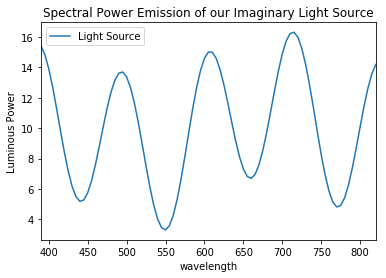

In [120]:
#plot our wierd light source power emmission
import matplotlib.pyplot as plt
data.plot(kind='line',x='wavelength',y='Light Source')
plt.ylabel('Luminous Power')
plt.title('Spectral Power Emission of our Imaginary Light Source')
plt.xlim(390,820)
plt.show()

In [121]:
#let's see how the different filters affect our light source
data['Lowpass Result']= pd.DataFrame( data['Light Source'].multiply(data['lowpass_filter'], axis="index") )
data['Highpass Result']= pd.DataFrame( data['Light Source'].multiply(data['highpass_filter'], axis="index") )
data['Bandpass Result']= pd.DataFrame( data['Light Source'].multiply(data['bandpass_filter'], axis="index") )
data['Vlambda Result']= pd.DataFrame( data['Light Source'].multiply(data['lum_efficiency'], axis="index") )
data.head()

,wavelength,lum_efficiency,lowpass_filter,highpass_filter,bandpass_filter,Light Source,Lowpass Result,Highpass Result,Bandpass Result,Vlambda Result
0,385,0.000396,1.0,0.0,0.0,15.587785,15.587785,0.0,0.0,0.006166
1,390,0.000800,1.0,0.0,0.0,15.412752,15.412752,0.0,0.0,0.012330
2,395,0.001546,1.0,0.0,0.0,14.838094,14.838094,0.0,0.0,0.022935
3,400,0.002800,1.0,0.0,0.0,13.910626,13.910626,0.0,0.0,0.038950
4,405,0.004656,1.0,0.0,0.0,12.704975,12.704975,0.0,0.0,0.059157


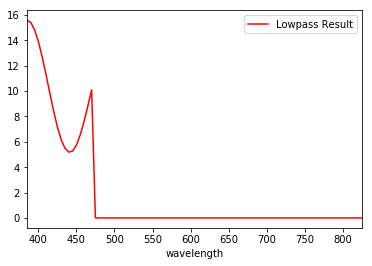

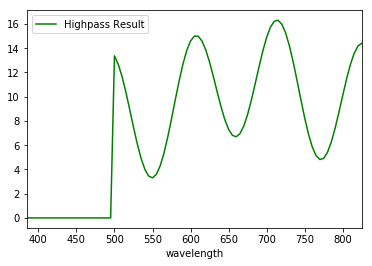

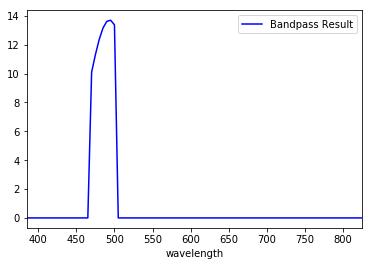

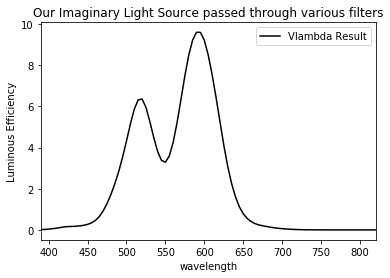

In [122]:
#now let's plot the result
data.plot(x='wavelength',y='Lowpass Result', color='red', linestyle='solid',)
data.plot(x='wavelength',y='Highpass Result', color='green', linestyle='solid',)
data.plot(x='wavelength',y='Bandpass Result', color='blue', linestyle='solid',)
data.plot(x='wavelength',y='Vlambda Result', color='black', linestyle='solid',)
plt.ylabel('Luminous Efficiency')
plt.title('Our Imaginary Light Source passed through various filters')
plt.xlim(390,820)
plt.show()